In [1]:
pip install pandas pymongo

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as l
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pymongo import MongoClient

In [6]:
# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['m_traffic_db']
collection = db['m_traffic_data']

# Retrieve all documents from the collection
documents = list(collection.find())

# Convert the documents to a Pandas DataFrame
df = pd.DataFrame(documents)

# Drop the _id column (if present)
if '_id' in df.columns:
    df = df.drop('_id', axis=1)

# Display the DataFrame
print(df.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [ ]:
#you should do the cleaning befor the EDA so you could see

# **Plot the time series data**

Analyze trends, seasonality, and potential outliers.

In [7]:
import plotly.express as px
fig = px.line(df, y="traffic_volume", title='traffic_volume per DateTime')
fig.show()

In [8]:
# we use go in ploty libirary for better visulise
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['traffic_volume'].index,
                         y=df['traffic_volume'],
                         mode='lines',
                         name='traffic_volume',
                         line=dict(color='blue')))
fig.update_layout(
    title='The Traffic Volume Plot',
    xaxis_title='Date',
    yaxis_title='Traffic Volume',
    xaxis_tickangle=-45,
    xaxis=dict(tickmode='auto', nticks=50),
    width=1500,
    height=700
)
fig.show()


# **Plot boxplots or scatter plots to identify any outliers or anomalies in the data.**

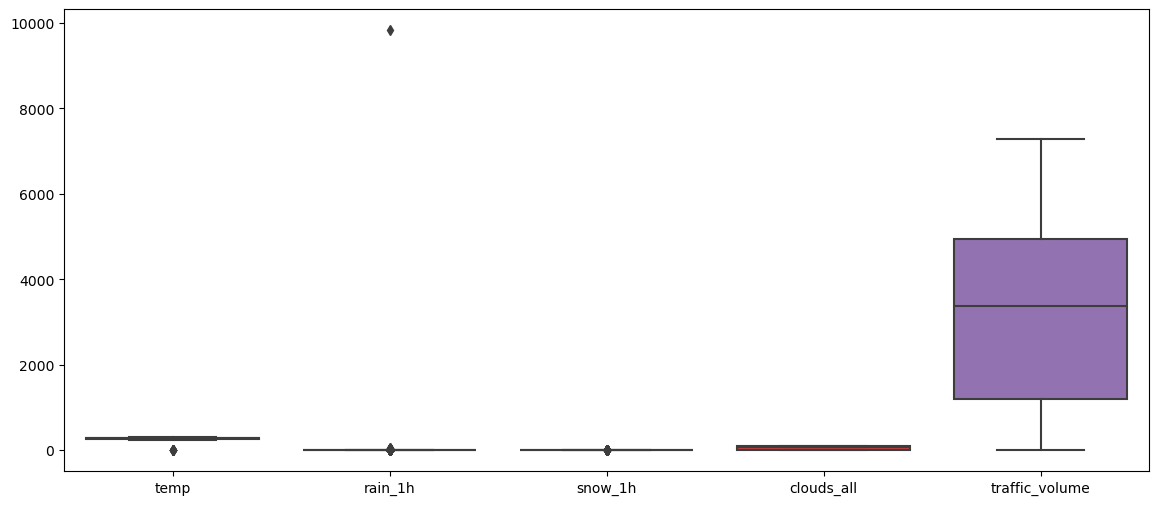

In [9]:
# deticting outliers
plt.figure(figsize=(14,6))
sns.boxplot(df)
plt.show()

# **Seasonal Decomposition**

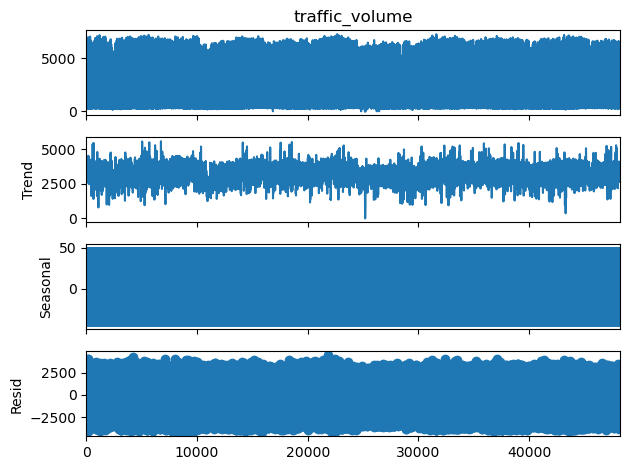

In [10]:
#This function does not handle missing values so do the cleaning!!
result = seasonal_decompose(df['traffic_volume'], model ='additive', period= 30)

result.plot()
plt.show()

## Data Preprocessing

Clean and preprocess the data.


**check if the data have the right type**

In [11]:
df['date_time'] = pd.to_datetime(df['date_time'])

**Make sure that the dates are sorted correctly.**

In [12]:
df.sort_values(by ='date_time' , inplace = True)

**Handle any missing values in the dataset**

In [13]:
df.isna().sum()

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64

**drop any duplc so we can use the Date as an index**

In [14]:
df.drop_duplicates(subset='date_time' , inplace= True)

**setting the index**

In [15]:
df.set_index('date_time' , inplace = True)

In [16]:
data = df[["traffic_volume"]]

In [46]:
df

holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                           
2012-10-02 09:00:00     NaN  288.28      0.0      0.0          40   
2012-10-02 10:00:00     NaN  289.36      0.0      0.0          75   
2012-10-02 11:00:00     NaN  289.58      0.0      0.0          90   
2012-10-02 12:00:00     NaN  290.13      0.0      0.0          90   
2012-10-02 13:00:00     NaN  291.14      0.0      0.0          75   
...                     ...     ...      ...      ...         ...   
2018-09-30 19:00:00     NaN  283.45      0.0      0.0          75   
2018-09-30 20:00:00     NaN  282.76      0.0      0.0          90   
2018-09-30 21:00:00     NaN  282.73      0.0      0.0          90   
2018-09-30 22:00:00     NaN  282.09      0.0      0.0          90   
2018-09-30 23:00:00     NaN  282.12      0.0      0.0          90   

                     weather_main     weather_description  traffic_volume  
date_time                                                                  
2012-10-02 09:00:00        Clouds        scattered clouds            5545  
2012-10-02 10:00:00        Clouds           broken clouds            4516  
2012-10-02 11:00:00        Clouds         overcast clouds            4767  
2012-10-02 12:00:00        Clouds         overcast clouds            5026  
2012-10-02 13:00:00        Clouds           broken clouds            4918  
...                           ...                     ...             ...  
2018-09-30 19:00:00        Clouds           broken clouds            3543  
2018-09-30 20:00:00        Clouds         overcast clouds            2781  
2018-09-30 21:00:00  Thunderstorm  proximity thunderstorm            2159  
2018-09-30 22:00:00        Clouds         overcast clouds            1450  
2018-09-30 23:00:00        Clouds         overcast clouds             954  

[40575 rows x 8 columns]

In [17]:
data

traffic_volume
date_time                          
2012-10-02 09:00:00            5545
2012-10-02 10:00:00            4516
2012-10-02 11:00:00            4767
2012-10-02 12:00:00            5026
2012-10-02 13:00:00            4918
...                             ...
2018-09-30 19:00:00            3543
2018-09-30 20:00:00            2781
2018-09-30 21:00:00            2159
2018-09-30 22:00:00            1450
2018-09-30 23:00:00             954

[40575 rows x 1 columns]

## Train-Test Split

Split the dataset into training and testing sets.


In [24]:
#data scaleing using MinMax Scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# generate X,y values , where X is the previous values and y is the target value
def create_sequen       ces(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# this is the number of lock back in the sequences
seq_length = 60
X, y = create_sequences(scaled_data, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# spilt the data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [19]:
y_test.shape

(8103,)

## Models Selection

 we have chosen LSTM and GRU.


## LSTM

In [25]:
tf.random.set_seed(7)

In [61]:
# model building
regressor = Sequential([
    l.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    l.Dropout(0.5),
    l.LSTM(units=50, return_sequences=True),
    l.Dropout(0.5),
    l.LSTM(units=50),
    l.Dropout(0.2),
    l.Dense(units=1)
])

c:\Users\96650\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [62]:
# compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [63]:
#show summary
regressor.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

### LSTM Training



In [64]:
historyR = regressor.fit(X_train, y_train, epochs=5, batch_size=32 , validation_split= 0.2 )

Epoch 1/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 52s 52ms/step - loss: 0.0576 - val_loss: 0.0139
Epoch 2/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 37s 45ms/step - loss: 0.0212 - val_loss: 0.0059
Epoch 3/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 38s 46ms/step - loss: 0.0140 - val_loss: 0.0053
Epoch 4/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - loss: 0.0116 - val_loss: 0.0037
Epoch 5/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - loss: 0.0102 - val_loss: 0.0031


### LSTM Predictions

In [66]:
prediction_lstm = regressor.predict(X_test)

254/254 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step


### LSTM Evaluation


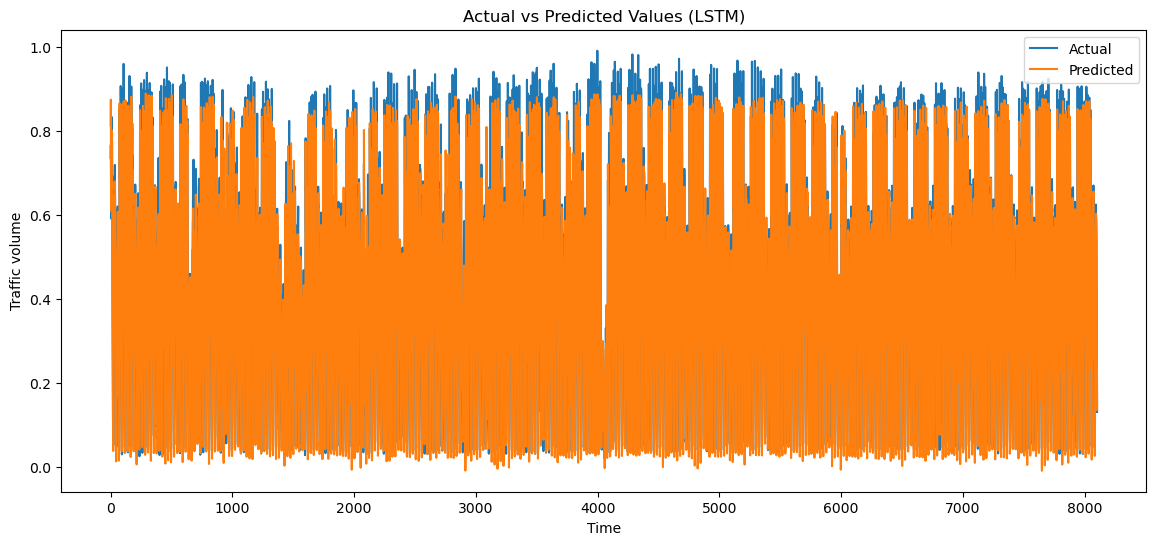

In [67]:
plt.figure(figsize=(14, 6))
plt.plot(y_test, label='Actual')
plt.plot(prediction_lstm, label='Predicted')
plt.title('Actual vs Predicted Values (LSTM)')
plt.xlabel('Time')
plt.ylabel('Traffic volume')
plt.legend()
plt.show()

to make the plot clear we select the last 200 value



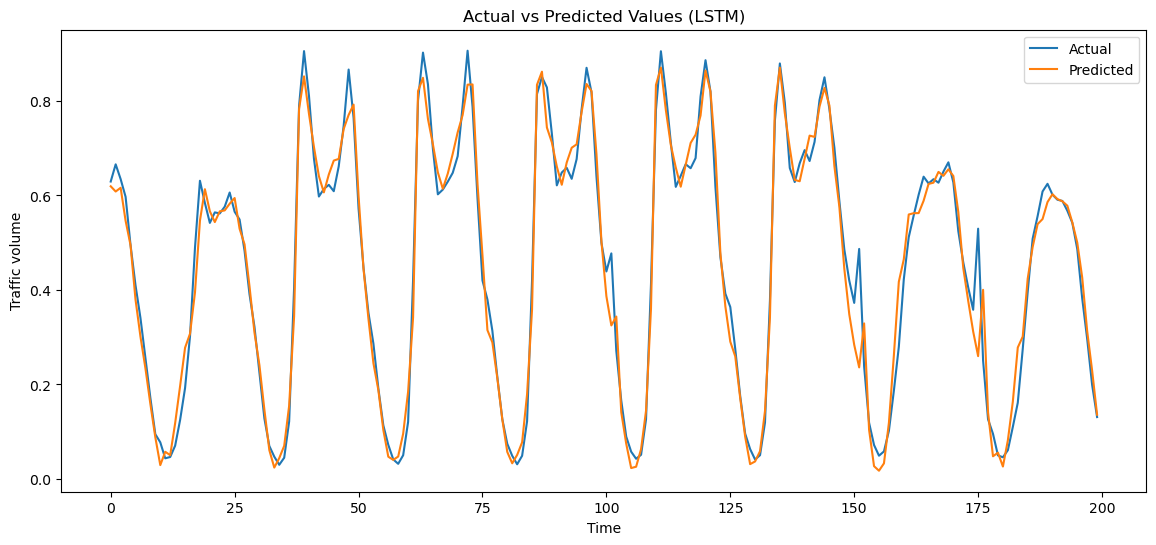

In [73]:
plt.figure(figsize=(14, 6))
plt.plot(y_test[-200:], label='Actual')
plt.plot(prediction_lstm[-200:], label='Predicted')
plt.title('Actual vs Predicted Values (LSTM)')
plt.xlabel('Time')
plt.ylabel('Traffic volume')
plt.legend()
plt.show()

In [69]:
#invaring the scaled value so we can see the MSE, RMSE for the actual data
prediction_lstm_inv = scaler.inverse_transform(prediction_lstm.reshape(-1, 1))
y_test_actual_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

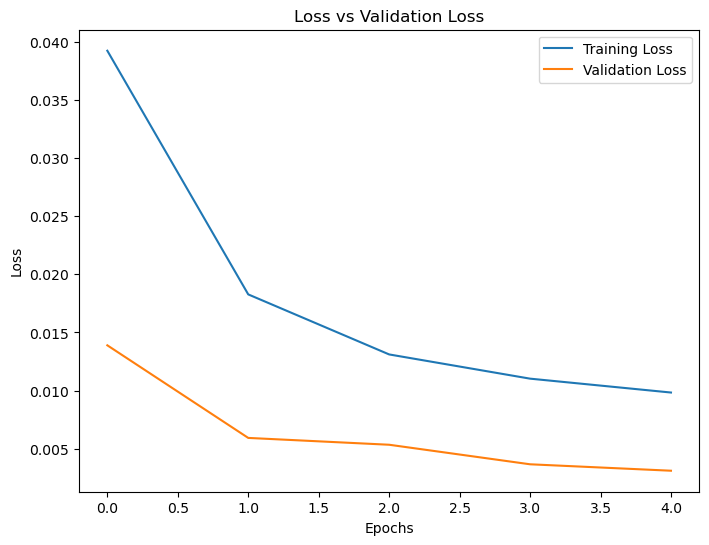

In [74]:
loss = historyR.history['loss']
val_loss = historyR.history['val_loss']

plt.figure(figsize=(8, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:
mse = mean_squared_error(y_test_actual_inv, prediction_lstm_inv)
print(f"Mean Squared Error (MSE): {mse:.2f}")
rmse = mean_squared_error(y_test_actual_inv, prediction_lstm_inv, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 149958.67
Root Mean Squared Error (RMSE): 387.24


## GRU

In [50]:
model = Sequential([
    l.GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    l.GRU(units=50, return_sequences=True),
    l.GRU(units=50, return_sequences=False),
    l.Dense(units=25),
    l.Dense(units=1)
])

c:\Users\96650\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [51]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [52]:
# get the summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                     │ (None, 60, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 60, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,851 (155.67 KB)

 Trainable params: 39,851 (155.67 KB)

 Non-trainable params: 0 (0.00 B)

##GRU Training

In [53]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32 , validation_split= 0.2)

Epoch 1/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 63s 62ms/step - loss: 0.0309 - val_loss: 0.0054
Epoch 2/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 50s 61ms/step - loss: 0.0092 - val_loss: 0.0046
Epoch 3/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 49s 61ms/step - loss: 0.0081 - val_loss: 0.0033
Epoch 4/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 51s 63ms/step - loss: 0.0068 - val_loss: 0.0027
Epoch 5/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 50s 61ms/step - loss: 0.0062 - val_loss: 0.0024


### GRU Predictions


In [56]:
prediction_gru = model.predict(X_test)

254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


###GRU Evaluation

In [57]:
#invaring the scaled value so we can see the MSE, RMSE for the actual data
prediction_gru = scaler.inverse_transform(prediction_gru.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

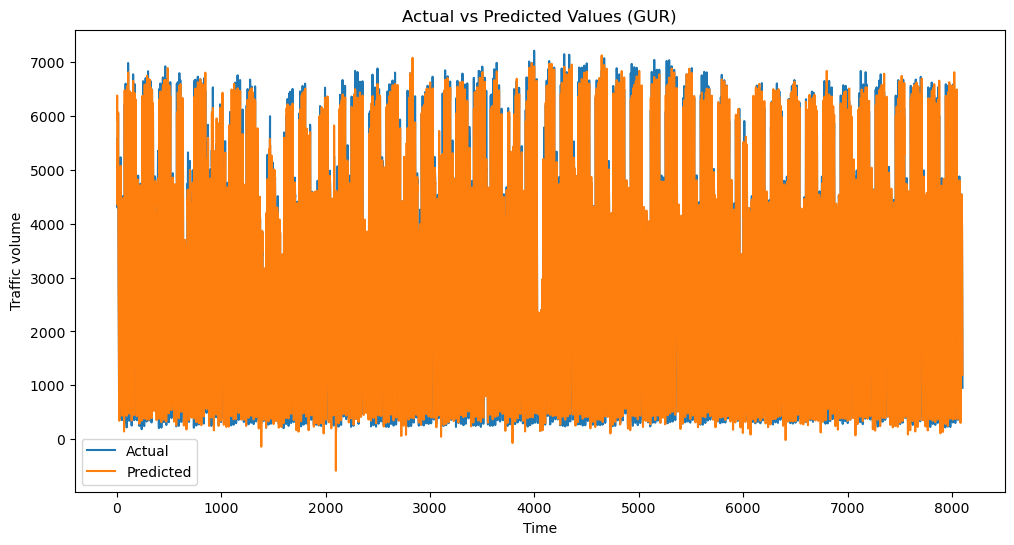

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(prediction_gru, label='Predicted')
plt.title('Actual vs Predicted Values (GUR)')
plt.xlabel('Time')
plt.ylabel('Traffic volume')
plt.legend()
plt.show()

to make the plot clear we select the last 200 values

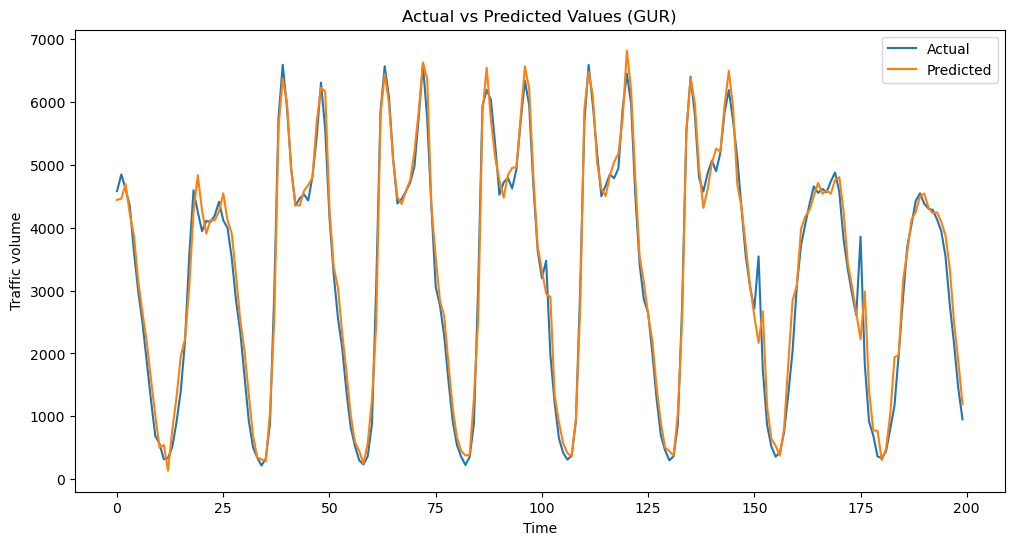

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual[-200:], label='Actual')
plt.plot(prediction_gru[-200:], label='Predicted')
plt.title('Actual vs Predicted Values (GUR)')
plt.xlabel('Time')
plt.ylabel('Traffic volume')
plt.legend()
plt.show()

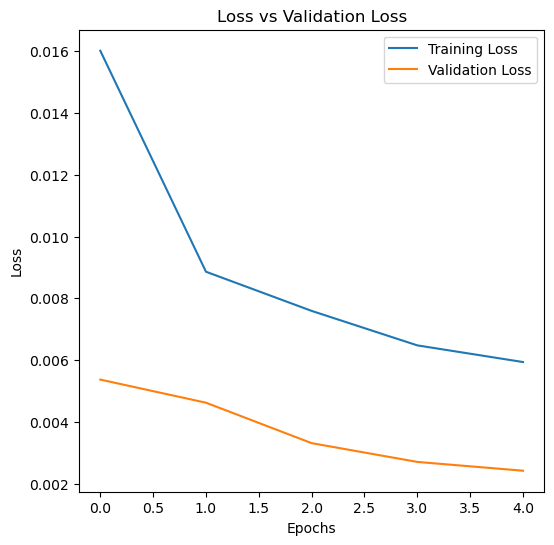

In [71]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(6, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
mse = mean_squared_error(y_test_actual, prediction_gru)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = mean_squared_error(y_test_actual, prediction_gru, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 108490.81
Root Mean Squared Error (RMSE): 329.38


## Extra plot

<Figure size 1200x600 with 0 Axes>

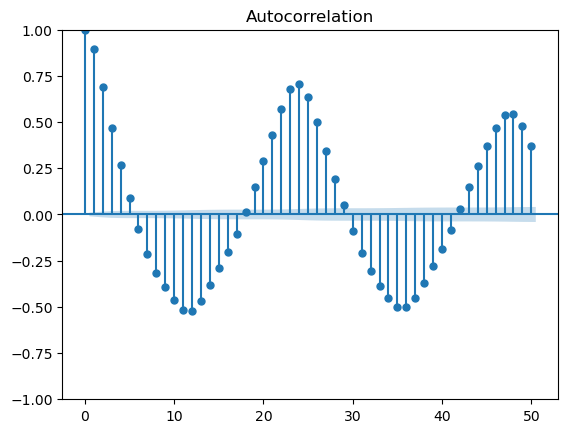

In [75]:
plt.figure(figsize=(12, 6))
plot_acf(df['traffic_volume'], lags=50)
plt.show()



In [47]:
df

holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                           
2012-10-02 09:00:00     NaN  288.28      0.0      0.0          40   
2012-10-02 10:00:00     NaN  289.36      0.0      0.0          75   
2012-10-02 11:00:00     NaN  289.58      0.0      0.0          90   
2012-10-02 12:00:00     NaN  290.13      0.0      0.0          90   
2012-10-02 13:00:00     NaN  291.14      0.0      0.0          75   
...                     ...     ...      ...      ...         ...   
2018-09-30 19:00:00     NaN  283.45      0.0      0.0          75   
2018-09-30 20:00:00     NaN  282.76      0.0      0.0          90   
2018-09-30 21:00:00     NaN  282.73      0.0      0.0          90   
2018-09-30 22:00:00     NaN  282.09      0.0      0.0          90   
2018-09-30 23:00:00     NaN  282.12      0.0      0.0          90   

                     weather_main     weather_description  traffic_volume  
date_time                                                                  
2012-10-02 09:00:00        Clouds        scattered clouds            5545  
2012-10-02 10:00:00        Clouds           broken clouds            4516  
2012-10-02 11:00:00        Clouds         overcast clouds            4767  
2012-10-02 12:00:00        Clouds         overcast clouds            5026  
2012-10-02 13:00:00        Clouds           broken clouds            4918  
...                           ...                     ...             ...  
2018-09-30 19:00:00        Clouds           broken clouds            3543  
2018-09-30 20:00:00        Clouds         overcast clouds            2781  
2018-09-30 21:00:00  Thunderstorm  proximity thunderstorm            2159  
2018-09-30 22:00:00        Clouds         overcast clouds            1450  
2018-09-30 23:00:00        Clouds         overcast clouds             954  

[40575 rows x 8 columns]

In [48]:
# Connect to MongoDB
db = client['m_traffic_db']
collection = db['m_traffic_data_new']

# Insert the data from the DataFrame into MongoDB
data_to_db = df.to_dict('records')
collection.insert_many(data_to_db)

InsertManyResult([ObjectId('66cc1d62e5ad1edf2ddd998d'), ObjectId('66cc1d62e5ad1edf2ddd998e'), ObjectId('66cc1d62e5ad1edf2ddd998f'), ObjectId('66cc1d62e5ad1edf2ddd9990'), ObjectId('66cc1d62e5ad1edf2ddd9991'), ObjectId('66cc1d62e5ad1edf2ddd9992'), ObjectId('66cc1d62e5ad1edf2ddd9993'), ObjectId('66cc1d62e5ad1edf2ddd9994'), ObjectId('66cc1d62e5ad1edf2ddd9995'), ObjectId('66cc1d62e5ad1edf2ddd9996'), ObjectId('66cc1d62e5ad1edf2ddd9997'), ObjectId('66cc1d62e5ad1edf2ddd9998'), ObjectId('66cc1d62e5ad1edf2ddd9999'), ObjectId('66cc1d62e5ad1edf2ddd999a'), ObjectId('66cc1d62e5ad1edf2ddd999b'), ObjectId('66cc1d62e5ad1edf2ddd999c'), ObjectId('66cc1d62e5ad1edf2ddd999d'), ObjectId('66cc1d62e5ad1edf2ddd999e'), ObjectId('66cc1d62e5ad1edf2ddd999f'), ObjectId('66cc1d62e5ad1edf2ddd99a0'), ObjectId('66cc1d62e5ad1edf2ddd99a1'), ObjectId('66cc1d62e5ad1edf2ddd99a2'), ObjectId('66cc1d62e5ad1edf2ddd99a3'), ObjectId('66cc1d62e5ad1edf2ddd99a4'), ObjectId('66cc1d62e5ad1edf2ddd99a5'), ObjectId('66cc1d62e5ad1edf2ddd99